### NBA - National Basketball Association 

##### Predicting how many points NBA players scored in the 2013-2014 season

    player - name of the player
    pos - the position of the player
    g - number of games the player was in
    gs - number of games the player started
    pts - total points the player scored

Age - Age; player age on February 1 of the given season.

G - Games

GS - Games Started (available since the 1982 season)

MP - Minutes Played (available since the 1951-52 season)

FG - Field Goals (includes both 2-point field goals and 3-point field goals)

FGA - Field Goal Attempts (includes both 2-point field goal attempts and 3-point field goal attempts)

FG% - Field Goal Percentage; the formula is FG / FGA.

2P - 2-Point Field Goals

2PA - 2-Point Field Goal Attempts

3P - 3-Point Field Goals (available since the 1979-80 season in the NBA)

3PA - 3-Point Field Goal Attempts (available since the 1979-80 season in the NBA)

FT - Free Throws

FTA - Free Throw Attempts

FT% - Free Throw Percentage; the formula is FT / FTA.

ORB - Offensive Rebounds (available since the 1973-74 season in the NBA)

DRB - Defensive Rebounds (available since the 1973-74 season in the NBA)

TRB - Total Rebounds (available since the 1950-51 season)

AST - Assists

STL - Steals (available since the 1973-74 season in the NBA)

BLK - Blocks (available since the 1973-74 season in the NBA)

TOV - Turnovers (available since the 1977-78 season in the NBA)

PF - Personal Fouls

PTS - Points

season

season_end





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# from sklearn.neighbors import KNeighborsClassifier


In [3]:
# reading data
with open("nba_2013.csv", 'r') as csvfile:
     nba = pd.read_csv(csvfile)

In [4]:
nba.head(20).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
player,Quincy Acy,Steven Adams,Jeff Adrien,Arron Afflalo,Alexis Ajinca,Cole Aldrich,LaMarcus Aldridge,Lavoy Allen,Ray Allen,Tony Allen,Al-Farouq Aminu,Louis Amundson,Chris Andersen,Alan Anderson,James Anderson,Ryan Anderson,Giannis Antetokounmpo,Carmelo Anthony,Joel Anthony,Pero Antic
pos,SF,C,PF,SG,C,C,PF,PF,SG,SG,SF,PF,C,SF,SG,PF,SF,PF,C,PF
age,23,20,27,28,25,25,28,24,38,32,23,31,35,31,24,25,19,29,31,31
bref_team_id,TOT,OKC,TOT,ORL,NOP,NYK,POR,TOT,MIA,MEM,NOP,TOT,MIA,BRK,PHI,NOP,MIL,NYK,TOT,ATL
g,63,81,53,73,56,46,69,65,73,55,80,19,72,78,80,22,77,77,33,50
gs,0,20,12,73,30,2,69,2,9,28,65,0,0,26,62,14,23,77,0,26
mp,847,1197,961,2552,951,330,2498,1072,1936,1278,2045,185,1396,1773,2309,795,1897,2982,186,925
fg,66,93,143,464,136,33,652,134,240,204,234,16,177,194,309,155,173,743,12,123
fga,141,185,275,1011,249,61,1423,300,543,413,494,32,275,485,717,354,418,1643,32,294
fg.,0.468,0.503,0.52,0.459,0.546,0.541,0.458,0.447,0.442,0.494,0.474,0.5,0.644,0.4,0.431,0.438,0.414,0.452,0.375,0.418


In [5]:
nba['pos'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [6]:
nba['season'].unique()

array(['2013-2014'], dtype=object)

In [7]:
nba['season_end'].unique()

array([2013], dtype=int64)

In [8]:
nba.shape

(481, 31)

In [9]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [10]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [11]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [12]:
nba['fg.'].fillna(value=nba['fg.'].mean(), inplace=True)
nba['x3p.'].fillna(value=nba['x3p.'].mean(), inplace=True)
nba['x2p.'].fillna(value=nba['x2p.'].mean(), inplace=True)
nba['efg.'].fillna(value=nba['efg.'].mean(), inplace=True)



nba['ft.'].fillna(value=nba['ft.'].mean(), inplace=True)

In [13]:
col =['age','g', 'gs', 'mp', 'fg', 'fga',
      'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts']

In [14]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098467,50.855639,132.751732,0.146218,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.401000,0.000000,3.000000,0.262626,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.437000,16.000000,48.000000,0.314607,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479000,68.000000,193.000000,0.366460,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


* From above we can say that there is no null values. 
* Average age of players is 26.50
* Average no. of games played by players are 53 etc.

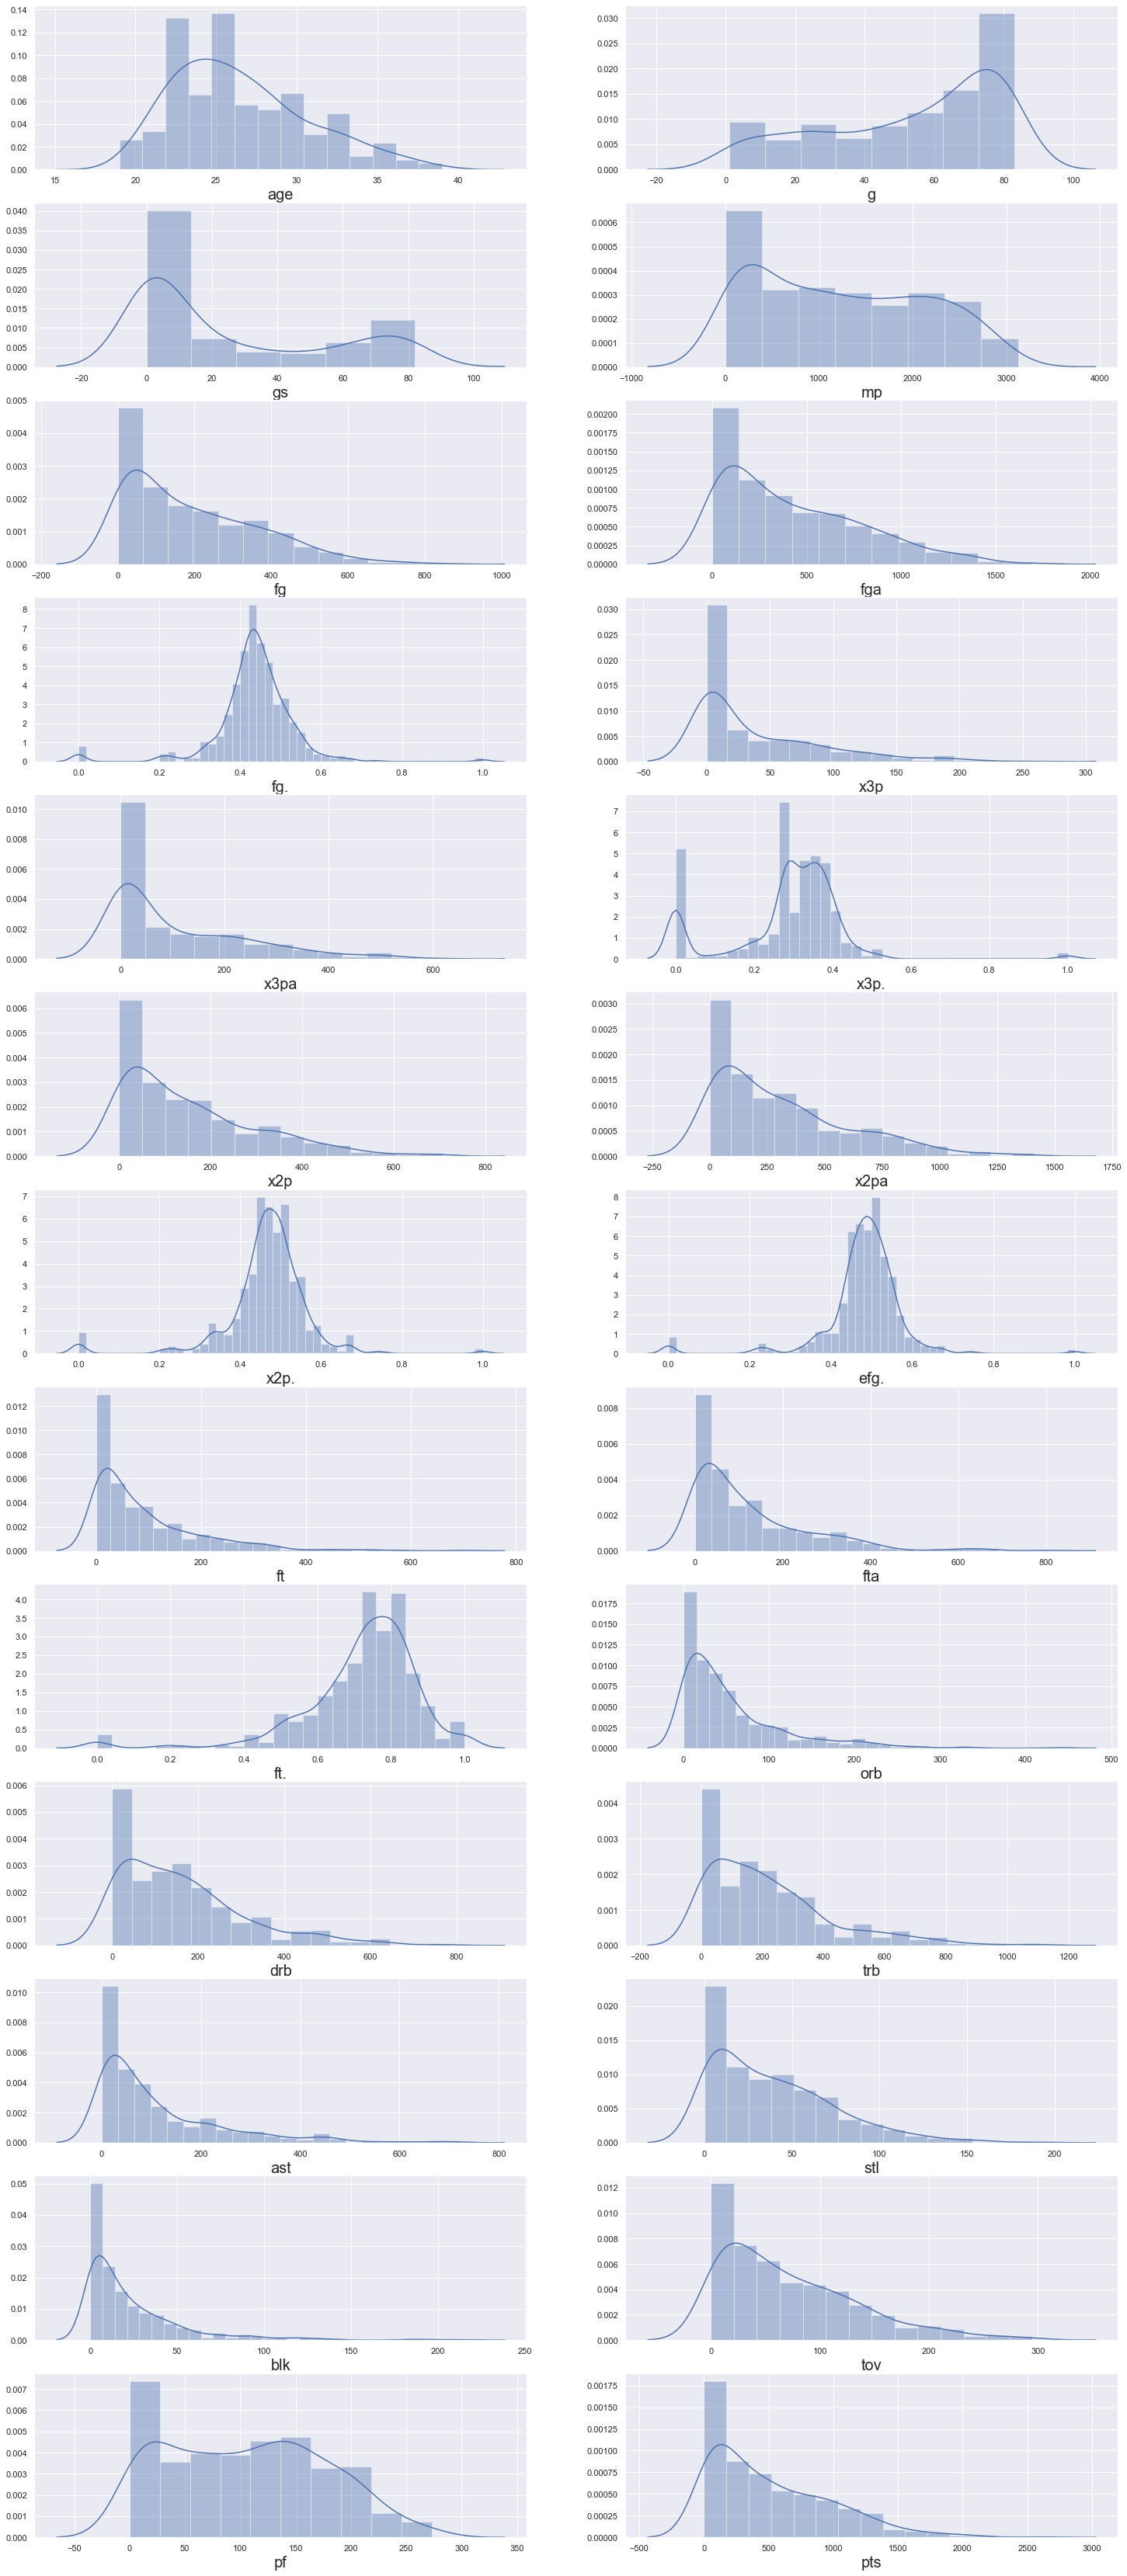

In [15]:
# let's see how data is distributed for every column
plt.figure(figsize=(25,60), facecolor='white')
plotnumber = 1

for column in nba[col]:
    if plotnumber<=26 :     # as there are 9 columns in the data
        ax = plt.subplot(13,2,plotnumber)
        sns.distplot(nba[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

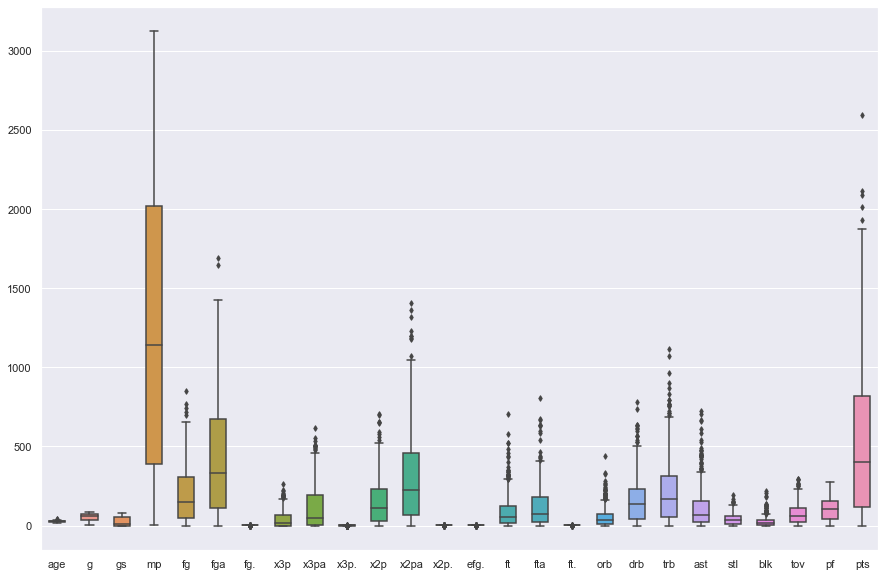

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = nba[col], width = 0.5, ax=ax, fliersize= 4)

In [17]:
q= nba['age'].quantile(0.99)
data_cleaned = nba[nba['age']<q]

q= nba['fg'].quantile(0.98)
data_cleaned  = nba[nba['fg']<q]

q= nba['fga'].quantile(0.99)
data_cleaned  = nba[nba['fg']<q]

q= nba['fg.'].quantile(0.99)
data_cleaned  = nba[nba['fg.']<q]

q= nba['x3p'].quantile(0.98)
data_cleaned  = nba[nba['x3p']<q]

q= nba['x3pa'].quantile(0.98)
data_cleaned  = nba[nba['x3pa']<q]

q= nba['x3p.'].quantile(0.99)
data_cleaned  = nba[nba['x3p.']<q]

q= nba['x2p'].quantile(0.98)
data_cleaned  = nba[nba['x2p']<q]

q= nba['x2pa'].quantile(0.95)
data_cleaned  = nba[nba['x2pa']<q]


q= nba['x2p.'].quantile(0.99)
data_cleaned  = nba[nba['x2p.']<q]

q= nba['efg.'].quantile(0.99)
data_cleaned  = nba[nba['efg.']<q]

q= nba['ft'].quantile(0.95)
data_cleaned  = nba[nba['ft']<q]

q= nba['fta'].quantile(0.95)
data_cleaned  = nba[nba['fta']<q]

q= nba['ft.'].quantile(0.99)
data_cleaned  = nba[nba['ft.']<q]

q= nba['orb'].quantile(0.98)
data_cleaned  = nba[nba['orb']<q]
                       
q= nba['drb'].quantile(0.95)
data_cleaned  = nba[nba['drb']<q]
                       
q= nba['trb'].quantile(0.95)
data_cleaned  = nba[nba['trb']<q]
                       
q= nba['ast'].quantile(0.98)
data_cleaned  = nba[nba['ast']<q]
                       
q= nba['stl'].quantile(0.98)
data_cleaned  = nba[nba['stl']<q]
                       
q= nba['blk'].quantile(0.98)
data_cleaned  = nba[nba['blk']<q]
                       
q= nba['tov'].quantile(0.98)
data_cleaned  = nba[nba['tov']<q]
                       
q= nba['fga'].quantile(0.99)
data_cleaned  = nba[nba['fg']<q]

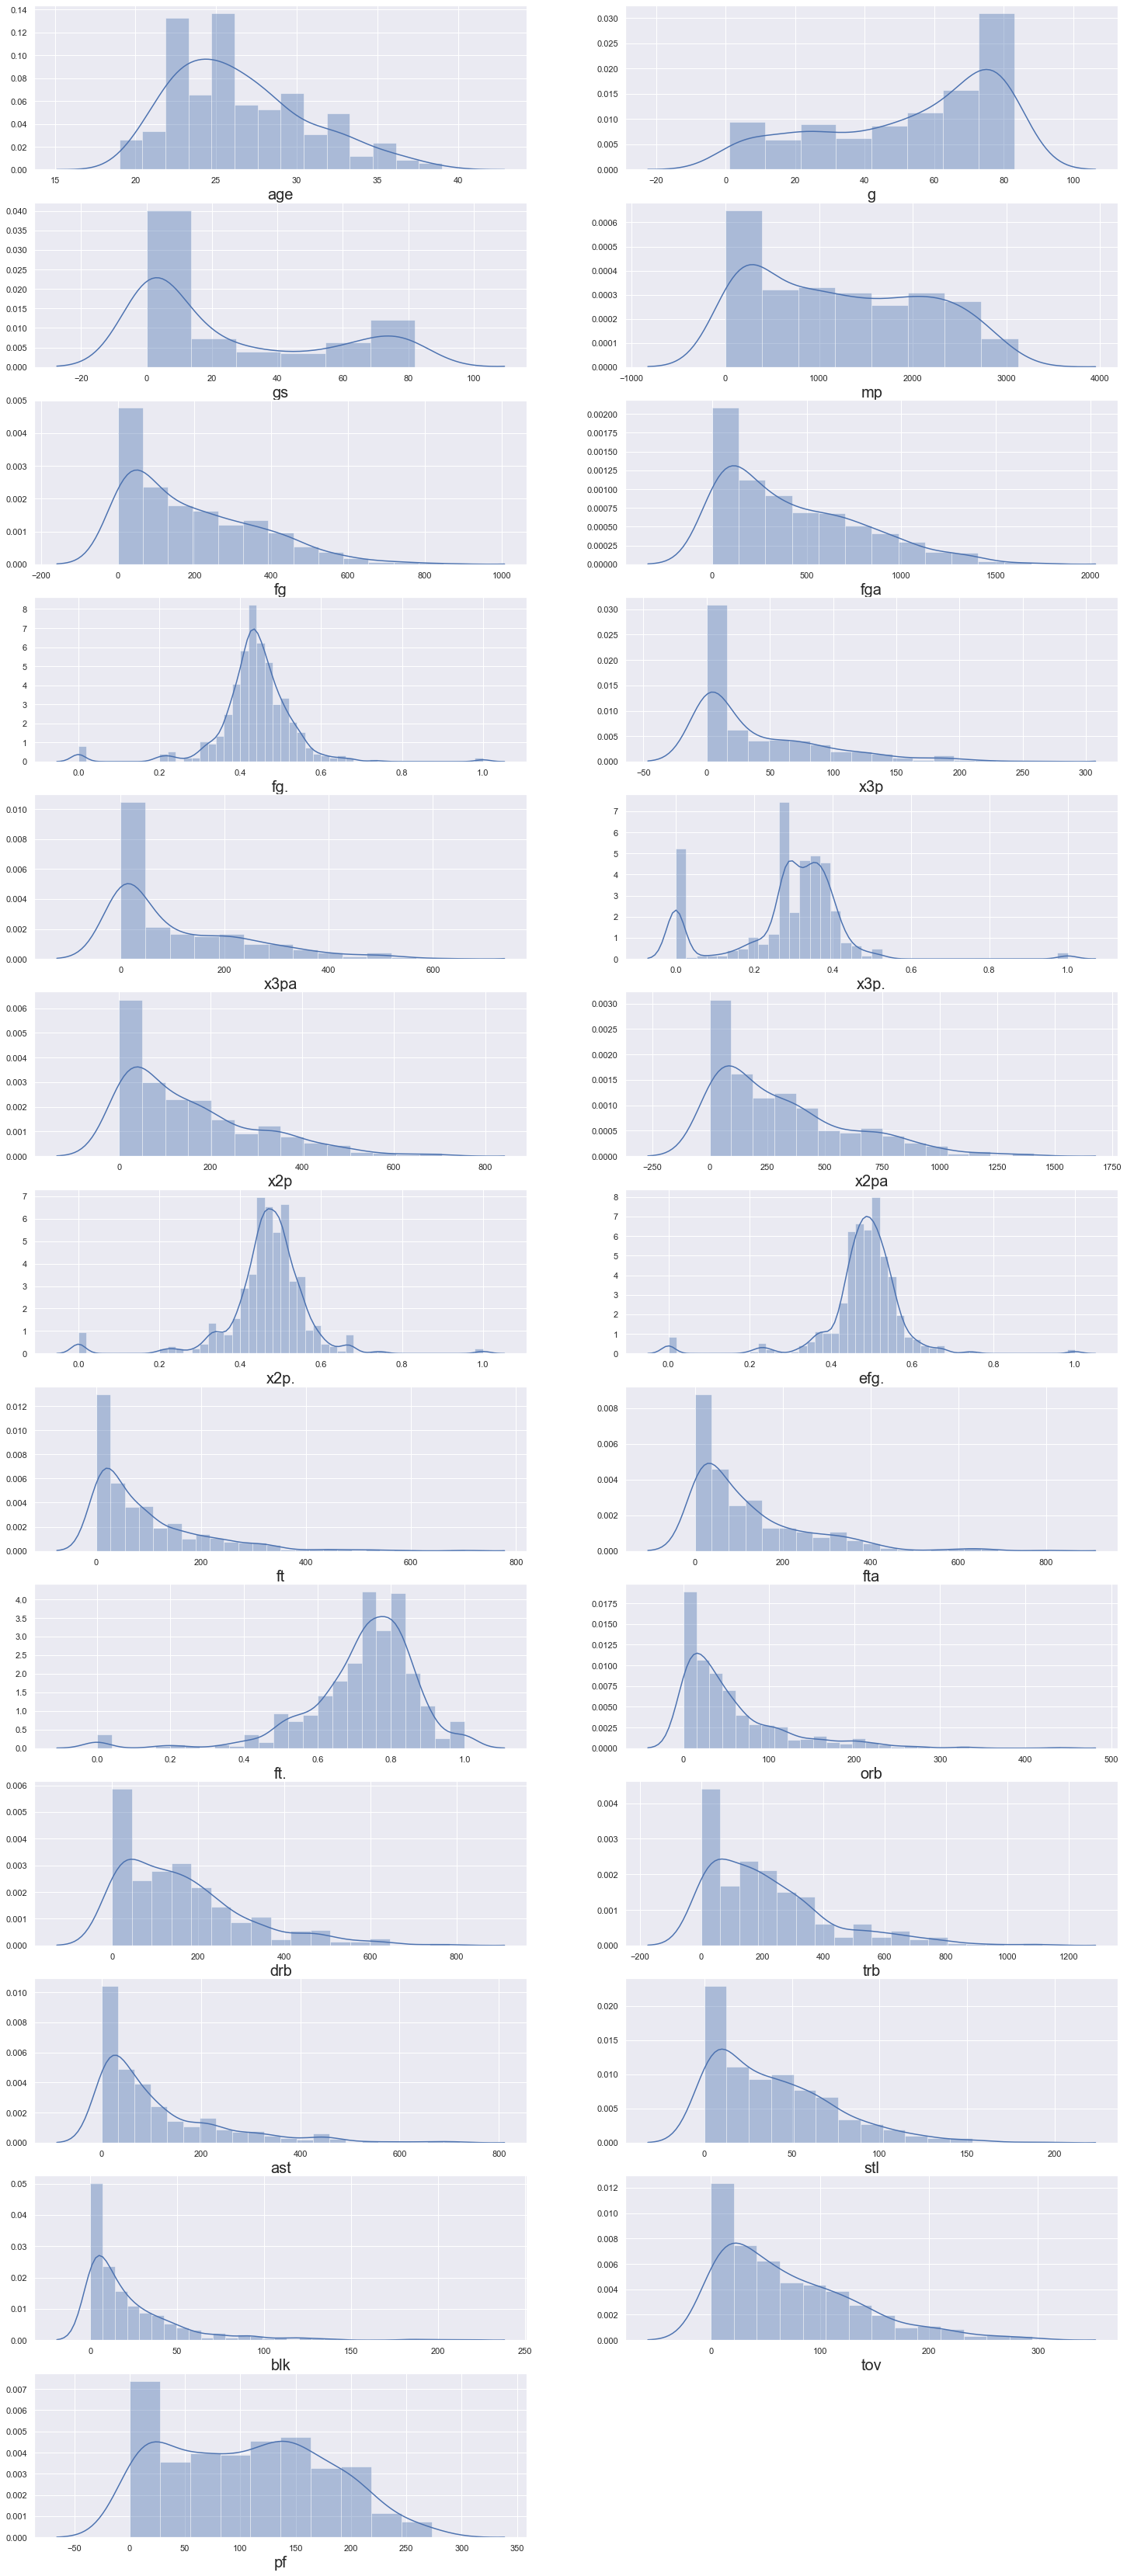

In [18]:
# let's see how data is distributed for every column
plt.figure(figsize=(25,60), facecolor='white')
plotnumber = 1

for column in data_cleaned[col]:
    if plotnumber<=25 :
        ax = plt.subplot(13,2,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

As above there are outliers 

In [19]:
X = nba[col].drop(columns =['pts'])
Y = nba['pts']

In [20]:
X.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf'],
      dtype='object')

In [21]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size= 0.25)

In [24]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
y_pred = knn.predict(x_test)

In [26]:
knn.score(x_train,y_train)

0.15

In [27]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [28]:
gridsearch = GridSearchCV(knn, param_grid, verbose=3)

In [29]:
gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.042, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.000, total=   0.0s
[CV] algorith

C:\Users\Tarun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.014, tot

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.042, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.014, total

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.028, 

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=7, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.028, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.014, total=

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.042, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=5, score=0.028, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, score=0.028, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.014, total=   0.0s
[CV

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=13, score=0.028, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=3, score=0.042, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=3, score=0.028, total=   0.0s
[CV]

[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, score=0.028, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10 .................
[CV]  algorit

[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=3, score=0.042, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=3, score=0.028, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=5, score=0.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=5, score=0.028, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=5, score=0.014, total=   0.0s
[CV] al

[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.028, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=25, n_neighbors=5, score=0.028, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.028, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.014, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=27, n_neighbors=12, score=0.028, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=13, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=13, score=0.028, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, score=0.014, total=   0.0s
[CV] algorithm=

[CV]  algorithm=brute, leaf_size=32, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=10, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=10, score=0.028, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=11, score=0.014, total=   0.0s
[CV] algorithm

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    9.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [30]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}

In [31]:
knn = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size=18, n_neighbors=3)

In [32]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
knn.score(x_train,y_train)

0.28888888888888886

Accuracy some how increases but still too low. Let's check for test dataset

In [34]:
knn.score(x_test, y_test)

0.01652892561983471

##### As above we can say that our KNN model not performing well for given NBA dataset